**Author: Abdullah Yasser Borai Ahmed Ismail
Model Used: Random Forest
The purpose of this system is to predict the Credit Score of a person based on his financial record
Used CSV file retreived from https://www.kaggle.com/datasets/parisrohan/credit-score-classification/download?datasetVersionNumber=1**

**Importing the needed libraries**

In [1]:
# importing the used libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Using Inline matplotlib to directly view graphs inside this notebook
%matplotlib inline

# importing the libraries used to handle the data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# importing the libraries used to predict and assess the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Loading the CSV file that has the data**

In [2]:
# loading the file that contains the training data
training_data_path = "/kaggle/input/credit-score/train.csv"

# loading the file
training_data = pd.read_csv(training_data_path)

/tmp/ipykernel_33/1473462552.py:5: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  training_data = pd.read_csv(training_data_path)


**Cleaning the data**

In [3]:
# printing the number of rows and columns
print(training_data.shape)

# checking if the data has null values
print(training_data.isnull().sum())

(100000, 28)
ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [4]:
# getting rid of the rows that contain null values and putting it in a new dataset
cleaned_training_data = training_data.dropna(axis=0, how='any')

# checking if the cleaning was done successfully
print(cleaned_training_data.shape)
print(cleaned_training_data.isnull().sum())

(53049, 28)
ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


**Converting output into numerical values**

In [5]:
# if we print the column of the credit score, we will see that it's represented as text
print(cleaned_training_data['Credit_Score'])
# we need to transform these in order to be able to plot them
# in order to do this first we need to make a mapping for the credit score
credit_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}

# creating a new column called Numerical_Credit_Score to contain the credit scores as integers
cleaned_training_data['Numerical_Credit_Score'] = cleaned_training_data['Credit_Score'].map(credit_mapping)

# printing it
print(cleaned_training_data['Numerical_Credit_Score'])


0            Good
6            Good
8        Standard
9            Good
10       Standard
           ...   
99994        Poor
99995        Poor
99996        Poor
99997        Poor
99999        Poor
Name: Credit_Score, Length: 53049, dtype: object
0        3
6        3
8        2
9        3
10       2
        ..
99994    1
99995    1
99996    1
99997    1
99999    1
Name: Numerical_Credit_Score, Length: 53049, dtype: int64


/tmp/ipykernel_33/2365687023.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_training_data['Numerical_Credit_Score'] = cleaned_training_data['Credit_Score'].map(credit_mapping)


**Finding the relation between variables**

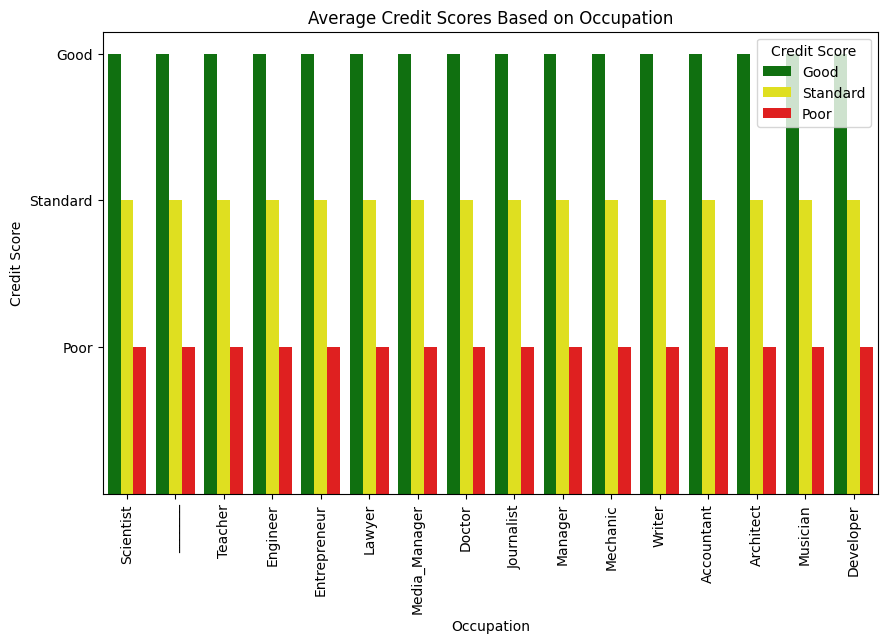

In [6]:
# plotting the relationship between variables
# first let's see if the occupation has an effect on the person's score or not

# plotting this relationship
# creating a bar plot
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Occupation', y = 'Numerical_Credit_Score', hue = 'Credit_Score', 
            data = cleaned_training_data, errorbar = None,
            palette = {'Good': 'green', 'Standard': 'yellow', 'Poor': 'red'})

# setting titles and labels
plt.title('Average Credit Scores Based on Occupation')
plt.xlabel('Occupation')
plt.ylabel('Credit Score')

# customizing the plot
# putting a title for the legends
plt.legend(title='Credit Score')
# rotating the occupation texts
plt.xticks(rotation=90)
# presenting the numerical credit scores (y-axis) as text
plt.yticks(ticks=[1, 2, 3], labels=['Poor', 'Standard', 'Good'])  # Setting y-ticks labels to credit scores

# displaying the bar plot
plt.show()

**From the plot, we can see that there is no relationship between both variables**

In [7]:
# printing the Credit History Age column to see its format
print(cleaned_training_data['Credit_History_Age'])

# detecting a pattern in the String
print(cleaned_training_data['Credit_History_Age'][0])
# each column has two items: Years and Months
print(cleaned_training_data['Credit_History_Age'][0][0])
print(cleaned_training_data['Credit_History_Age'][0][1])

print(cleaned_training_data['Credit_History_Age'][0].split())


# to transform it into numerical data instead of Strings, we can for example express it as just number of Months

cleaned_training_data['Numerical_Credit_History_Age'] = [int(i.split()[0]) * 12 + int(i.split()[3]) for i in cleaned_training_data['Credit_History_Age']]
print(cleaned_training_data['Numerical_Credit_History_Age'] )

0         22 Years and 1 Months
6         22 Years and 7 Months
8         26 Years and 7 Months
9         26 Years and 8 Months
10        26 Years and 9 Months
                  ...          
99994     31 Years and 5 Months
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 53049, dtype: object
22 Years and 1 Months
2
2
['22', 'Years', 'and', '1', 'Months']
0        265
6        271
8        319
9        320
10       321
        ... 
99994    377
99995    378
99996    379
99997    380
99999    382
Name: Numerical_Credit_History_Age, Length: 53049, dtype: int64


/tmp/ipykernel_33/259895096.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_training_data['Numerical_Credit_History_Age'] = [int(i.split()[0]) * 12 + int(i.split()[3]) for i in cleaned_training_data['Credit_History_Age']]


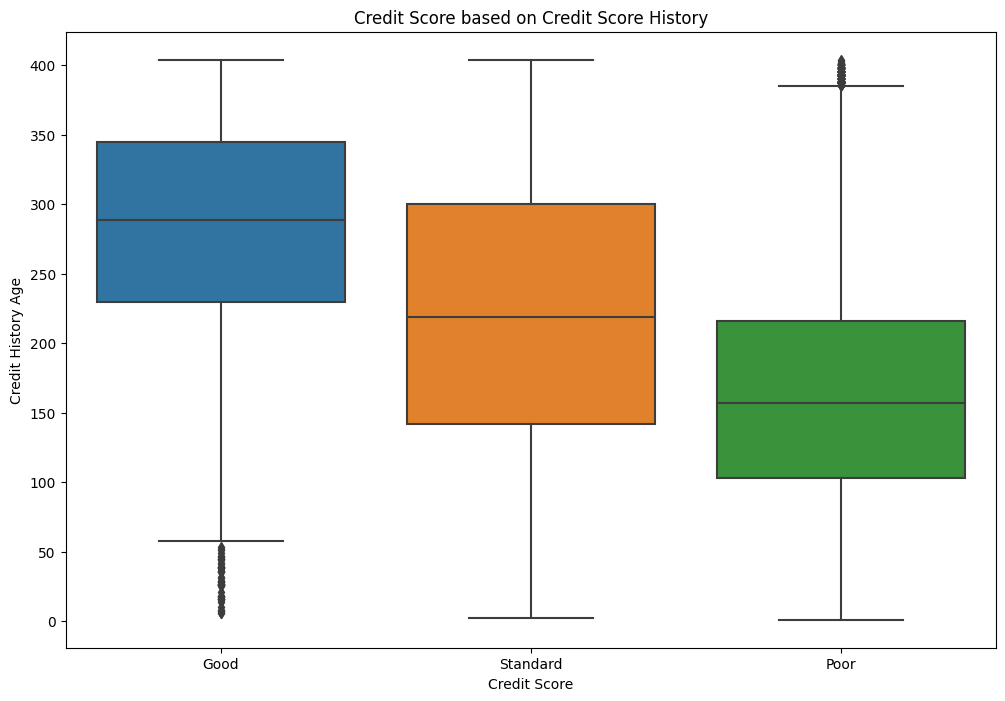

In [8]:
# plotting the relationship between the Credit History Age and Credit Score
# creating a box plot figure
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'Credit_Score', y = 'Numerical_Credit_History_Age', data = cleaned_training_data, dodge = False)

# adjusting the titles and labels
plt.title('Credit Score based on Credit Score History')
plt.xlabel('Credit Score')
plt.ylabel('Credit History Age')

# displaying the graph
plt.show()

**Transforming the rest of the data into numbers**

In [9]:
# displaying the info of the data to know the type of each variable
print(cleaned_training_data.info())

# coverting the variables that can be valuable into numerical data
cleaned_training_data['Age'] = pd.to_numeric(cleaned_training_data['Age'], errors='coerce') 
cleaned_training_data['Annual_Income'] = pd.to_numeric(cleaned_training_data['Annual_Income'], errors='coerce')  
cleaned_training_data['Num_of_Loan'] = pd.to_numeric(cleaned_training_data['Num_of_Loan'], errors='coerce')  
cleaned_training_data['Num_of_Delayed_Payment'] = pd.to_numeric(cleaned_training_data['Num_of_Delayed_Payment'], errors='coerce')  
cleaned_training_data['Changed_Credit_Limit'] = pd.to_numeric(cleaned_training_data['Changed_Credit_Limit'], errors='coerce') 
cleaned_training_data['Outstanding_Debt'] = pd.to_numeric(cleaned_training_data['Outstanding_Debt'], errors='coerce')
cleaned_training_data['Amount_invested_monthly'] = pd.to_numeric(cleaned_training_data['Amount_invested_monthly'], errors='coerce') 
cleaned_training_data['Monthly_Balance'] = pd.to_numeric(cleaned_training_data['Monthly_Balance'], errors='coerce') 

# also, Credit Mix is important but it's non-numerical, so we should transform it by creating a map for it
# printing the possible values of Credit Mix so that we can get an idea about them
#print(cleaned_training_data['Credit_Mix'].unique())
# creting a map for credit mix
print(cleaned_training_data['Credit_Mix'].unique())
credit_mix_mapping = {"Standard": 1, "Good": 2, "Bad": 0, "_": 1}                                  # here the non-assigned value - took an average value which is 1 (2 + 1 + 0 / 3)
mapped_credit_mix = cleaned_training_data["Credit_Mix"].map(credit_mix_mapping)

# Dropping the rest (non-numerical) of the columns from our data 
non_numeric_columns = cleaned_training_data.select_dtypes(exclude=['number']).columns
final_training_data = cleaned_training_data.drop(columns=non_numeric_columns)

# printing their types
print(final_training_data.info())

# adding the mapped Credit Mix to the data
final_training_data['Credit_Mix'] = mapped_credit_mix

<class 'pandas.core.frame.DataFrame'>
Index: 53049 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            53049 non-null  object 
 1   Customer_ID                   53049 non-null  object 
 2   Month                         53049 non-null  object 
 3   Name                          53049 non-null  object 
 4   Age                           53049 non-null  object 
 5   SSN                           53049 non-null  object 
 6   Occupation                    53049 non-null  object 
 7   Annual_Income                 53049 non-null  object 
 8   Monthly_Inhand_Salary         53049 non-null  float64
 9   Num_Bank_Accounts             53049 non-null  int64  
 10  Num_Credit_Card               53049 non-null  int64  
 11  Interest_Rate                 53049 non-null  int64  
 12  Num_of_Loan                   53049 non-null  object 
 13  Type_o

/tmp/ipykernel_33/1188781090.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_training_data['Age'] = pd.to_numeric(cleaned_training_data['Age'], errors='coerce')
/tmp/ipykernel_33/1188781090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_training_data['Annual_Income'] = pd.to_numeric(cleaned_training_data['Annual_Income'], errors='coerce')
/tmp/ipykernel_33/1188781090.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

**Detecting the relationship between variables**

In [10]:
# determining the relationship between variables
variables_relation = final_training_data.corr()
# printing the relationships between the Credit Score and the rest of the variables
print(variables_relation['Numerical_Credit_Score'])

Age                             0.003960
Annual_Income                   0.012794
Monthly_Inhand_Salary           0.214824
Num_Bank_Accounts              -0.009015
Num_Credit_Card                -0.011021
Interest_Rate                  -0.004518
Num_of_Loan                    -0.010843
Delay_from_due_date            -0.427684
Num_of_Delayed_Payment         -0.002566
Changed_Credit_Limit           -0.151172
Num_Credit_Inquiries           -0.010329
Outstanding_Debt               -0.382499
Credit_Utilization_Ratio        0.037878
Total_EMI_per_month             0.002515
Amount_invested_monthly         0.158084
Monthly_Balance                 0.203961
Numerical_Credit_Score          1.000000
Numerical_Credit_History_Age    0.391987
Credit_Mix                      0.444589
Name: Numerical_Credit_Score, dtype: float64


**Splitting the data**

In [11]:
# preparing the x and y values for training the Random Forest
# X is simply everything except the Credit Score
X = final_training_data.drop('Numerical_Credit_Score', axis = 1)                   
# Y is the Credit Score
y = final_training_data['Numerical_Credit_Score']

# replacing the nan values with the median as the model can't accept them into the data
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# splitting the data using test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Training the model**

In [12]:
# training the Random Forest Model
# creating the model
model = RandomForestClassifier()
# fitting
model.fit(X_train, y_train)

RandomForestClassifier()

**Predicting some data and assessing the model**

In [13]:
# using the model to predict some data
y_predicted = model.predict(X_test)

# printing the accuracy of the model
print("The accuracy of the model = " + str(accuracy_score(y_test, y_predicted) * 100) + str(" %"))

The accuracy of the model = 77.30442978322337 %
